In [1]:
# check if config exists
try:
    config
except NameError:
    config_exists = False
else:
    config_exists = True

# make config if it does not exist already (e.g. passed in by papermill)
if not(config_exists):
    # set up some config for the experiment run
    config = {
        "data_path" : "C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/trollers.csv",
    }
print(config)

{'data_path': 'C:/Users/nico_/Desktop/ITBA/TFI/global fishing watch/dataset/trollers.csv'}


In [2]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.6.1.
The scikit-learn version is 1.0.2.


Cargamos el dataset.

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

trollers = pd.read_csv(config['data_path'], header="infer", sep=",",error_bad_lines=False, engine ='python')

#Nos quedamos solo con las columnas que estan clasificadas 100% como pescando, o no pescando. Que no haya duda.
df = trollers.copy()
df = df[(df['is_fishing'] == -1.0)  | (df['is_fishing'] == 1.0) ]

#Renombramos las columnas de la variable a predecir de si esta pescando o no.
df["is_fishing"] = np.where(df["is_fishing"] == 1.0, 'SI', 'NO')
trollers = df.copy()
#print(trollers)

Dropeamos los NA, y nos quedamos con los puntos que se encuentran a 3 millas de la costa.

In [4]:
#Dropeamos NA.
df = df.dropna()
#Generamos Feature Engeniering.
df = df[(df['distance_from_shore'] >= 5556)]
#print(len(df))
#Dropeamos columnas que no interesen en el modelo.

trollers = df.copy()

In [5]:
df.groupby('is_fishing').head(3)


,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
270,7.652701e+13,1.402047e+09,8246.008789,23769.144531,7.6,248.899994,38.364540,15.511744,NO,gfw
271,7.652701e+13,1.402048e+09,8944.052734,24165.498047,7.8,252.399994,38.353802,15.478086,NO,gfw
272,7.652701e+13,1.402049e+09,10629.884766,25238.240234,7.6,252.600006,38.343842,15.442498,NO,gfw
3780,7.652701e+13,1.433329e+09,12529.657227,25297.601562,7.9,280.700012,38.371609,15.637877,SI,gfw
3781,7.652701e+13,1.433329e+09,12805.934570,25960.873047,7.8,277.399994,38.373089,15.624347,SI,gfw
3782,7.652701e+13,1.433329e+09,12805.934570,25960.873047,7.9,281.600006,38.373466,15.621642,SI,gfw


In [6]:

def n_prior_to_condition(df, n, condition):
    groups = condition.iloc[::-1].cumsum()
    return df.groupby(groups).tail(n+1)[:15000]

df = trollers
aux = df.copy()

for i in range(1,10000):
    aux = n_prior_to_condition(df, i, df.is_fishing=="SI")  
    aux = aux.drop_duplicates()
    yes = (len(aux[aux['is_fishing']=='SI']))
    no = (len(aux[aux['is_fishing']=='NO']))
    if (yes/no<=1):
        df=aux
        break
print(i)
print(len(df[df['is_fishing']=='SI']))
print((len(df[df['is_fishing']=='NO'])))
print(df)
#print(len(new_df[new_df['is_fishing']=='SI']))
#print(len(new_df[new_df['is_fishing']=='NO']))

225
1883
1883
                mmsi     timestamp  distance_from_shore  distance_from_port  \
270     7.652701e+13  1.402047e+09          8246.008789        23769.144531   
271     7.652701e+13  1.402048e+09          8944.052734        24165.498047   
272     7.652701e+13  1.402049e+09         10629.884766        25238.240234   
273     7.652701e+13  1.402050e+09         11313.430664        26076.169922   
274     7.652701e+13  1.402050e+09         11180.065430        26400.109375   
...              ...           ...                  ...                 ...   
166226  2.740638e+14  1.479217e+09         14764.460938        29119.724609   
166232  2.740638e+14  1.479305e+09         13453.293945        24738.027344   
166240  2.740638e+14  1.479355e+09          9848.616211        12369.013672   
166241  2.740638e+14  1.479356e+09          9433.749023        11704.412109   
166242  2.740638e+14  1.479357e+09         10629.884766        12206.255859   

        speed      course        lat 

In [7]:
import plotly.express as px
import pandas as pd

fig = px.line_geo(df,lat='lat',lon='lon', hover_name="speed", color='is_fishing',line_group='mmsi',markers=True)
fig.update_layout(title = 'asd', title_x=0.5,mapbox_style="open-street-map")
fig.show()


In [8]:
df = df.drop(['mmsi', 'source','lat', 'lon','timestamp','source'], axis = 1)
print(df)


        distance_from_shore  distance_from_port  speed      course is_fishing
270             8246.008789        23769.144531    7.6  248.899994         NO
271             8944.052734        24165.498047    7.8  252.399994         NO
272            10629.884766        25238.240234    7.6  252.600006         NO
273            11313.430664        26076.169922    7.5   66.000000         NO
274            11180.065430        26400.109375    7.6   71.500000         NO
...                     ...                 ...    ...         ...        ...
166226         14764.460938        29119.724609    7.9  256.100006         NO
166232         13453.293945        24738.027344    7.5  229.699997         NO
166240          9848.616211        12369.013672    2.4  123.800003         NO
166241          9433.749023        11704.412109    2.9  120.000000         NO
166242         10629.884766        12206.255859    2.8  105.800003         NO

[3766 rows x 5 columns]


Generamos los vectores de train y test.

In [9]:
#Generamos train y test.

#Si la longitud del dataset es mayor a 10000, partiremos agrupado por "is_fishing" ya que nos puede tocar un conjunto con is_fishing='SI' vacio.
#if len(dataset)>10000:
    #df = df.sample(n=10000, random_state=1)
#    df = df.groupby("is_fishing").sample(n=7500, random_state=1,replace=True)
#    df = df.drop_duplicates()

X = df.drop('is_fishing',axis=1)
y = df['is_fishing']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=50)
print(len(df[df['is_fishing']=='SI']))
print(len(df[df['is_fishing']=='NO']))

1883
1883


Funcion para evaluar los modelos.

In [10]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import tabulate
from sklearn.metrics import confusion_matrix, accuracy_score


def evaluate_model(title,y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)
    display(Markdown(title))
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['NO', 'SI'])
    cmd_obj.plot()
    cmd_obj.ax_.set(
                    title='Matriz de confusión.', 
                    xlabel='Predict Values', 
                    ylabel='Actual Values')
    plt.show()
    _precision_score = precision_score(y_test, y_pred,pos_label='SI')
    _recall_score = recall_score(y_test, y_pred, pos_label='SI')
    _accuracy_score = accuracy_score(y_test, y_pred)
    _f1_score = f1_score(y_test, y_pred, pos_label='SI')

    data = [["Precision","Recall","Accuracy","F1"],
            ["%.2f" % _precision_score, "%.2f" % _recall_score, "%.2f" % _accuracy_score, "%.2f" % _f1_score ]]
    table = tabulate.tabulate(data, tablefmt='html')
    display(table)
    return _precision_score, _recall_score, _accuracy_score, _f1_score


Arboles de decision optimizado

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
Train Accuracy : 0.967
Test Accuracy : 0.879
Best Score Through Grid Search : 0.872
Best Parameters :  {'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'splitter': 'random'}
Best Parameters :  {'max_depth': 15, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0, 'splitter': 'random'}


Arboles de decision optimizado

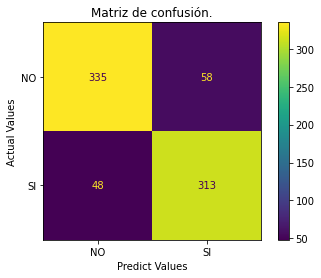

Precision,Recall,Accuracy,F1
0.84,0.87,0.86,0.86


In [11]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#extra_tree_classifier = ExtraTreeClassifier(random_state=1)
#extra_tree_classifier.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [11,12,13,14,15,16],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0, 0.1,0.2],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10] }

grid = GridSearchCV(DecisionTreeClassifier(random_state=1), cv=3, n_jobs=-1, verbose=3,
                    param_grid =parameters
                    )

grid.fit(X_train, y_train)

print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
print('Best Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

dt = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'], 
                            max_features=grid.best_params_['max_features'],
                            max_leaf_nodes=grid.best_params_['max_leaf_nodes'],
                            min_samples_leaf=grid.best_params_['min_samples_leaf'],
                            min_weight_fraction_leaf=grid.best_params_['min_weight_fraction_leaf'],
                            splitter=grid.best_params_['splitter']
)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print('Best Parameters : ',grid.best_params_)
dt_precision_score, dt_recall_score, dt_accuracy_score, dt_f1_score = evaluate_model('Arboles de decision optimizado',y_test, y_pred)

Random forest optimizado

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Train Accuracy : 0.999
Test Accuracy : 0.893
Best Score Through Grid Search : 0.907
Best Parameters :  {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Random forest optimizado

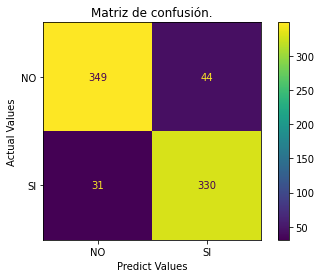

Precision,Recall,Accuracy,F1
0.88,0.91,0.90,0.90


In [12]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [12,13,14,15],
    'max_features': ["auto", "sqrt", "log2"],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2, 5 , 10],
    'n_estimators': [100, 200]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid.fit(X_train, y_train)

print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
print('Best Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

dt = RandomForestClassifier(bootstrap=grid.best_params_['bootstrap'], 
                            max_depth=grid.best_params_['max_depth'],
                            max_features=grid.best_params_['max_features'],
                            min_samples_leaf=grid.best_params_['min_samples_leaf'],
                            min_samples_split=grid.best_params_['min_samples_split'],
                            n_estimators=grid.best_params_['n_estimators']
)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
rf_precision_score, rf_recall_score, rf_accuracy_score, rf_f1_score = evaluate_model('Random forest optimizado', y_test, y_pred)


In [13]:
print('Best Parameters : ',grid.best_params_)

Best Parameters :  {'bootstrap': True, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Support Vector Machine.

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Train Accuracy : 0.925
Test Accuracy : 0.855
Best Score Through Grid Search : 0.873
Best Parameters :  {'C': 1, 'gamma': 1e-06, 'kernel': 'rbf'}


rbf

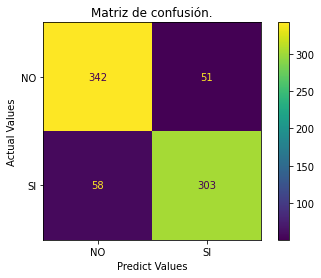

Precision,Recall,Accuracy,F1
0.86,0.84,0.86,0.85


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Train Accuracy : 0.505
Test Accuracy : 0.479
Best Score Through Grid Search : 0.505
Best Parameters :  {'C': 0.001, 'coef0': 0.01, 'gamma': 0.1, 'kernel': 'sigmoid'}


sigmoid

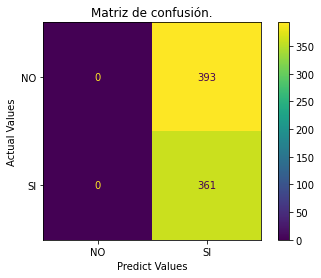

Precision,Recall,Accuracy,F1
0.48,1.00,0.48,0.65


In [14]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],'C': [0.001, 0.10, 0.1, 10 ]},
              {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],'C': [0.001, 0.10, 0.1, 10], 'coef0 ':[0,0.1,1]},
              {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 1]}     
]

parameters = [{'kernel': ['rbf'], 'gamma': [1e-2,1e-3,1e-4,1e-5,1e-6],'C': [0.001,0.01,0.1,1,10,100,1000]},
              {'kernel': ['sigmoid'], 'gamma': [1e-2,1e-3,1e-4,1e-5,1e-6],'C': [0.001,0.01,0.1,1,10,100,1000],'coef0' : [0.01,0.1,1,10]},
              {'kernel': ['linear'], 'C': [0.1,1,10,100,1000]}
              ]

for parameter in parameters:
    param_grid = parameter
    
    grid = GridSearchCV(SVC(), param_grid, n_jobs = -1, verbose = 3)
    grid.fit(X_train, y_train)
    kernel_str = parameter['kernel'][0]
    y_pred = grid.predict(X_test)
    dt = grid
    
    print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
    print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
    print('Best Score Through Grid Search : %.3f'%grid.best_score_)
    print('Best Parameters : ',grid.best_params_)

    svm_precision_score, svm_recall_score, svm_accuracy_score, svm_f1_score = evaluate_model(kernel_str, y_test, y_pred)


light_gbm default

light_gbm default

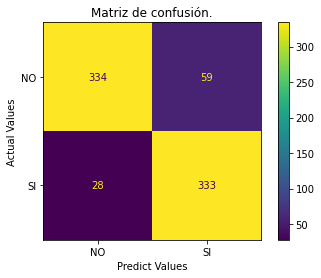

Precision,Recall,Accuracy,F1
0.85,0.92,0.88,0.88


(0.8494897959183674,
 0.9224376731301939,
 0.8846153846153846,
 0.8844621513944224)

In [15]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

dt=lgb.LGBMClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
evaluate_model('light_gbm default',y_test, y_pred)

light_gbm con optimizacion bayesiana.

In [16]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from bayes_opt import BayesianOptimization
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import LabelEncoder
def label_encoder(input_df, encoder_dict=None):
    """ Process a dataframe into a form useable by LightGBM """
    # Label encode categoricals
    categorical_feats = input_df.columns[input_df.dtypes == 'object']
    for feat in categorical_feats:
        encoder = LabelEncoder()
        input_df[feat] = encoder.fit_transform(input_df[feat].fillna('NULL'))
    return input_df, categorical_feats.tolist(), encoder_dict

application_train = X_train.join(y_train)
application_train, categorical_feats, encoder_dict = label_encoder(application_train)

X = application_train.drop('is_fishing', axis=1)
y = application_train.is_fishing


#dtrain = lgb.Dataset(data=X, label=y)

def bayesion_opt_lgbm(X, y, init_iter=3, n_iters=7, random_state=11, seed = 101, num_iterations=100):
    dtrain = lgb.Dataset(data=X, label=y)

    def lgb_r2_score(preds, dtrain):
        labels = dtrain.get_label()
        return 'r2', r2_score(labels, preds), True

    def auc_score(preds,dtrain):
        labels = dtrain.get_label()
        return 'auc', roc_auc_score(labels, preds), True
        #f = roc_auc_score(y_test, y_score)

    # Objective Function
    #def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight,lambda_l1, lambda_l2, learning_rate):
    def hyp_lgbm(num_leaves, feature_fraction,   min_split_gain, lambda_l1, lambda_l2, learning_rate):

            params = {'application':'binary','num_iterations': num_iterations,'early_stopping_round':int(50 + 7/learning_rate),
                        'metric':'auc_score'} # Default parameters

            params["num_leaves"] = int(round(num_leaves))
            params['feature_fraction'] = max(min(feature_fraction, 1), 0)
            #params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
            #params['max_depth'] = int(round(max_depth))
            params['min_split_gain'] = min_split_gain
            #params['min_child_weight'] = min_child_weight
            
            params['learning_rate']= max(min(learning_rate, 1), 0)
            params['lambda_l1']= lambda_l1
            params['lambda_l2']= lambda_l2
            
            params['verbose']=-1
            params['objective'] ='binary'
            params['boost_from_average']=True #adjusts initial score to the mean of labels for faster convergence
            
            cv_results = lgb.cv(params, dtrain, nfold=3, seed=seed,categorical_feature=[], stratified=False, verbose_eval =None, feval=auc_score)
                            
            # print(cv_results)
            return np.max(cv_results['auc-mean'])
    # Domain space-- Range of hyperparameters 
    #https://lightgbm.readthedocs.io/en/latest/Parameters.html

    pds = {
                #'eta':(0.025,0.15),
                'num_leaves': (8, 1024),
                'feature_fraction': (0.1, 1.0),
                #'bagging_fraction': (0.1, 1),
                #'max_depth': (30, 70),
                'min_split_gain': (0.0, 20),
                #'min_child_weight': (10, 50),
                'lambda_l1':(0.0,10),
                'lambda_l2':(0.0,100),
                'learning_rate':(0.01, 0.2)          
                }



    # Surrogate model
    optimizer = BayesianOptimization(hyp_lgbm, pds, random_state=random_state)
                                        
    # Optimize
    optimizer.maximize(init_points=init_iter, n_iter=n_iters)
    return optimizer.max['params']

parametros_optimos = bayesion_opt_lgbm(X, y, init_iter=1000, n_iters=20, random_state=50, seed = 40, num_iterations = 1000)
print(parametros_optimos)


|   iter    |  target   | featur... | lambda_l1 | lambda_l2 | learni... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
|  1        |  0.8872   |  0.5451   |  2.281    |  25.55    |  0.0853   |  7.546    |  1.021e+0 |
|  2        |  0.8809   |  0.4674   |  7.719    |  76.05    |  0.0689   |  6.931    |  365.4    |
|  3        |  0.8795   |  0.2309   |  9.727    |  90.92    |  0.1164   |  6.272    |  910.4    |
|  4        |  0.8759   |  0.7071   |  3.911    |  50.72    |  0.1096   |  18.56    |  588.5    |
|  5        |  0.8983   |  0.7015   |  0.5226   |  32.71    |  0.02072  |  3.597    |  948.7    |
|  6        |  0.8738   |  0.9442   |  7.141    |  73.27    |  0.09773  |  18.63    |  420.9    |
|  7        |  0.8764   |  0.7149   |  6.499    |  59.88    |  0.05219  |  13.65    |  900.1    |
|  8

In [17]:
print(parametros_optimos)

{'feature_fraction': 0.8594127990369141, 'lambda_l1': 2.043705140316802, 'lambda_l2': 50.10999669375798, 'learning_rate': 0.1658643674623466, 'min_split_gain': 0.16040659402374757, 'num_leaves': 584.1856369011658}


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 862
[LightGBM] [Info] Number of data points in the train set: 3012, number of used features: 4
[LightGBM] [Info] Start training from score 0.505312
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

light_gbm optimizacion bayesiana

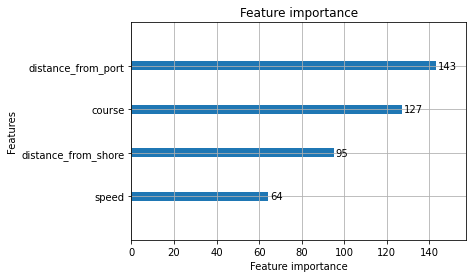

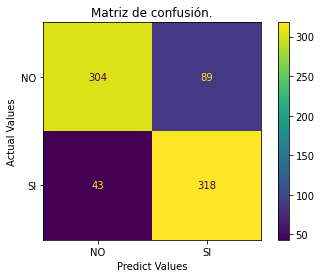

Precision,Recall,Accuracy,F1
0.78,0.88,0.82,0.83


In [18]:
#parametros_optimos['max_depth'] = int(round(parametros_optimos['max_depth']))
parametros_optimos['num_leaves'] = int(round(parametros_optimos['num_leaves']))

dtrain = lgb.Dataset(data=X, label=y)
def lgb_r2_score(preds, dtrain):
        labels = dtrain.get_label()
        return 'r2', r2_score(labels, preds), True

def auc_score(preds,dtrain):
        labels = dtrain.get_label()
        return 'auc', roc_auc_score(labels, preds), True
        
#dt = lgb.train(parametros_optimos,  dtrain,categorical_feature=[], verbose_eval =None, feval=lgb_r2_score)
dt = lgb.train(parametros_optimos,  dtrain,categorical_feature=[], verbose_eval =None, feval=auc_score)

#clf = lgb.fit(parametros_optimos,  dtrain,categorical_feature=[], verbose_eval =None, feval=lgb_r2_score)

lgb.plot_importance(dt)

y_pred = dt.predict(X_test)
#if>=0.5 ---> 1
#else ---->0
#rounding the values
y_pred=y_pred.round(0)
y_pred=y_pred.astype(int)
y_pred = np.where(y_pred == 1, 'SI', 'NO')
#print(y_pred)

lgbm_precision_score, lgbm_recall_score, lgbm_accuracy_score, lgbm_f1_score = evaluate_model('light_gbm optimizacion bayesiana',y_test, y_pred)
#cols = feature_importance_df_lgb[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:50].index


In [50]:
from IPython.display import Markdown as md
md(f'''| Algorithm     | Precision     | Recall        | Accuracy      | F1            |
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Arboles de decision  |{dt_precision_score:.3f}|	{dt_recall_score:.3f}|	{dt_accuracy_score:.3f}|	{dt_f1_score:.3f}|
|Random Forest       |{rf_precision_score:.3f} |	{rf_recall_score:.3f}|	{rf_accuracy_score:.3f}|	{rf_f1_score:.3f}|
|    SVM        | {svm_precision_score:.3f} |	{svm_recall_score:.3f}|	{svm_accuracy_score:.3f}|	{svm_f1_score:.3f}
| LightGBM      |{lgbm_precision_score:.3f}|	{lgbm_recall_score:.3f}|	{lgbm_accuracy_score:.3f}|	{lgbm_f1_score:.3f}|
'''
       )


| Algorithm     | Precision     | Recall        | Accuracy      | F1            |
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Arboles de decision  |0.844|	0.867|	0.859|	0.855|
|Random Forest       |0.882 |	0.914|	0.901|	0.898|
|    SVM        | 0.479 |	1.000|	0.479|	0.648
| LightGBM      |0.781|	0.881|	0.825|	0.828|
